In [1]:
#The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(None, 'f250fdcd-cca8-4f77-9de6-d9c02c3919c3', 'p-20e03b82add8102e5369b2cb96ae8c8d36d0dc05')
pc = project.project_context

In [2]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))

Project Name: Python Data Analysis
Project Description: Python Data Analysis
Project Bucket Name: pythondataanalysis-donotdelete-pr-xgmwfxjcvmypvc
Project Assets (Connections): []


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Getting csv file and loading as pandas datafarme
data = pd.read_csv(project.get_file('weatherAUS.csv'))
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
# Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# And we need to replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [8]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
110161,10.4,18.9,0.6,5.469824,7.624853,30.0,7.0,11.0,68.84381,51.482606,1020.000000,1018.700000,4.437189,4.503167,14.9,18.0,0,1
69286,14.7,27.8,0.0,8.400000,11.000000,33.0,20.0,17.0,67.00000,32.000000,1014.400000,1012.900000,0.000000,6.000000,18.0,25.5,0,0
24663,18.4,26.4,115.4,5.469824,7.624853,26.0,4.0,13.0,99.00000,81.000000,1017.653758,1015.258204,4.437189,4.503167,19.7,23.2,1,0


In [9]:
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0


In [10]:
# In order to scale all the features between 0 and 1:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [11]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 113754)
y_train shape is:  (113754,)
x_test shape is:  (17, 28439)
y_test shape is:  (28439,)


In [12]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

In [13]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [14]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

In [15]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

In [16]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Cost after iteration 0: 0.711469
Cost after iteration 20: 0.457993
Cost after iteration 40: 0.431180
Cost after iteration 60: 0.418007
Cost after iteration 80: 0.409534
Cost after iteration 100: 0.403382
Cost after iteration 120: 0.398649
Cost after iteration 140: 0.394881
Cost after iteration 160: 0.391809
Cost after iteration 180: 0.389262
Cost after iteration 200: 0.387120
Cost after iteration 220: 0.385300
Cost after iteration 240: 0.383738
Cost after iteration 260: 0.382388
Cost after iteration 280: 0.381214
Cost after iteration 300: 0.380186
Cost after iteration 320: 0.379282
Cost after iteration 340: 0.378483
Cost after iteration 360: 0.377773
Cost after iteration 380: 0.377140


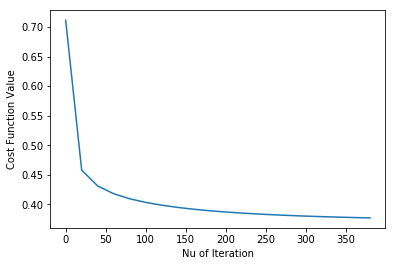

Test accuracy: 83.3221983895355%


In [18]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

In [19]:
# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy of sklearn logistic regression library: 0.8411688174689687
